# Import the libraries 

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
import statsmodels.api as sm

# Import the dataset

In [17]:
df = pd.read_csv('cov_tsa.csv',parse_dates=['REPORT_DATE'])
df

,PEOPLE_POSITIVE_CASES_COUNT,COUNTY_NAME,PROVINCE_STATE_NAME,REPORT_DATE,CONTINENT_NAME,DATA_SOURCE_NAME,PEOPLE_DEATH_NEW_COUNT,COUNTY_FIPS_NUMBER,COUNTRY_ALPHA_3_CODE,COUNTRY_SHORT_NAME,COUNTRY_ALPHA_2_CODE,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT
0,7844,Oneida,New York,2020-12-13,America,New York Times,1,36065.0,USA,United States,US,237,188
1,1830,Oneida,New York,2020-07-13,America,New York Times,3,36065.0,USA,United States,US,7,104
2,1776,Oneida,New York,2020-07-08,America,New York Times,1,36065.0,USA,United States,US,16,99
3,19215,Oneida,New York,2021-02-16,America,New York Times,2,36065.0,USA,United States,US,29,462
4,676,Oneida,New York,2020-05-12,America,New York Times,1,36065.0,USA,United States,US,7,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1634240,0,NaN,NaN,2020-01-21,America,JHU CSSE Global Timeseries,0,NaN,MAF,St Martin,MF,0,0
1634241,0,NaN,Macau,2020-01-21,Asia,JHU CSSE Global Timeseries,0,NaN,CHN,China,CN,0,0
1634242,0,NaN,NaN,2020-01-21,America,JHU CSSE Global Timeseries,0,NaN,BRB,Barbados,BB,0,0
1634243,0,NaN,NaN,2020-01-21,Europe,JHU CSSE Global Timeseries,0,NaN,RUS,Russia,RU,0,0


### Check for missing data

In [32]:
df.isna().sum()

PEOPLE_POSITIVE_CASES_COUNT             0
COUNTY_NAME                        124931
PROVINCE_STATE_NAME                 98654
REPORT_DATE                             0
CONTINENT_NAME                       1844
DATA_SOURCE_NAME                        0
PEOPLE_DEATH_NEW_COUNT                  0
COUNTY_FIPS_NUMBER                 150747
COUNTRY_ALPHA_3_CODE                 1844
COUNTRY_SHORT_NAME                      0
COUNTRY_ALPHA_2_CODE                 2305
PEOPLE_POSITIVE_NEW_CASES_COUNT         0
PEOPLE_DEATH_COUNT                      0
dtype: int64

###### Remove unwanted columns

In [42]:
cols=['PEOPLE_POSITIVE_CASES_COUNT','COUNTY_NAME','PROVINCE_STATE_NAME','CONTINENT_NAME','DATA_SOURCE_NAME','COUNTY_FIPS_NUMBER','COUNTRY_ALPHA_3_CODE','COUNTRY_ALPHA_2_CODE','PEOPLE_DEATH_COUNT']
df.drop(cols,axis=1,inplace=True)
df.head()

,REPORT_DATE,PEOPLE_DEATH_NEW_COUNT,COUNTRY_SHORT_NAME,PEOPLE_POSITIVE_NEW_CASES_COUNT
0,2020-12-13,1,United States,237
1,2020-07-13,3,United States,7
2,2020-07-08,1,United States,16
3,2021-02-16,2,United States,29
4,2020-05-12,1,United States,7


###### Again check for missing data

In [49]:
df.isna().sum()

REPORT_DATE                        0
PEOPLE_DEATH_NEW_COUNT             0
COUNTRY_SHORT_NAME                 0
PEOPLE_POSITIVE_NEW_CASES_COUNT    0
dtype: int64

###### Take only datas of USA

In [57]:
usa = df[df['COUNTRY_SHORT_NAME']=='United States']
usa

,REPORT_DATE,PEOPLE_DEATH_NEW_COUNT,COUNTRY_SHORT_NAME,PEOPLE_POSITIVE_NEW_CASES_COUNT
0,2020-12-13,1,United States,237
1,2020-07-13,3,United States,7
2,2020-07-08,1,United States,16
3,2021-02-16,2,United States,29
4,2020-05-12,1,United States,7
...,...,...,...,...
1538886,2020-01-21,0,United States,0
1538887,2020-01-21,0,United States,0
1538888,2020-01-21,0,United States,0
1538889,2020-01-21,0,United States,0


###### Take cases data

In [61]:
usa_cases = usa[['REPORT_DATE','PEOPLE_POSITIVE_NEW_CASES_COUNT']]
usa_cases

,REPORT_DATE,PEOPLE_POSITIVE_NEW_CASES_COUNT
0,2020-12-13,237
1,2020-07-13,7
2,2020-07-08,16
3,2021-02-16,29
4,2020-05-12,7
...,...,...
1538886,2020-01-21,0
1538887,2020-01-21,0
1538888,2020-01-21,0
1538889,2020-01-21,0


###### Aggregate the case reports happened on same dates

In [89]:
usa_cases = usa_cases.groupby('REPORT_DATE')['PEOPLE_POSITIVE_NEW_CASES_COUNT'].sum().reset_index()
usa_cases

,REPORT_DATE,PEOPLE_POSITIVE_NEW_CASES_COUNT
0,2020-01-21,1
1,2020-01-22,0
2,2020-01-23,0
3,2020-01-24,1
4,2020-01-25,1
...,...,...
456,2021-04-21,60514
457,2021-04-22,66358
458,2021-04-23,63752
459,2021-04-24,50575


###### Change the index of the dataframe to dates

In [90]:
usa_cases = usa_cases.set_index('REPORT_DATE')
usa_cases

,PEOPLE_POSITIVE_NEW_CASES_COUNT
REPORT_DATE,
2020-01-21,1
2020-01-22,0
2020-01-23,0
2020-01-24,1
2020-01-25,1
...,...
2021-04-21,60514
2021-04-22,66358
2021-04-23,63752


###### Check the frequency followed by index dates

In [ ]:
usa_cases.index

###### Indicate the frequency is happening by day

In [97]:
usa_cases.index.freq='D'

In [98]:
usa_cases.index

DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
               '2020-01-29', '2020-01-30',
               ...
               '2021-04-16', '2021-04-17', '2021-04-18', '2021-04-19',
               '2021-04-20', '2021-04-21', '2021-04-22', '2021-04-23',
               '2021-04-24', '2021-04-25'],
              dtype='datetime64[ns]', name='REPORT_DATE', length=461, freq='D')

# Visualization

<AxesSubplot:xlabel='REPORT_DATE'>

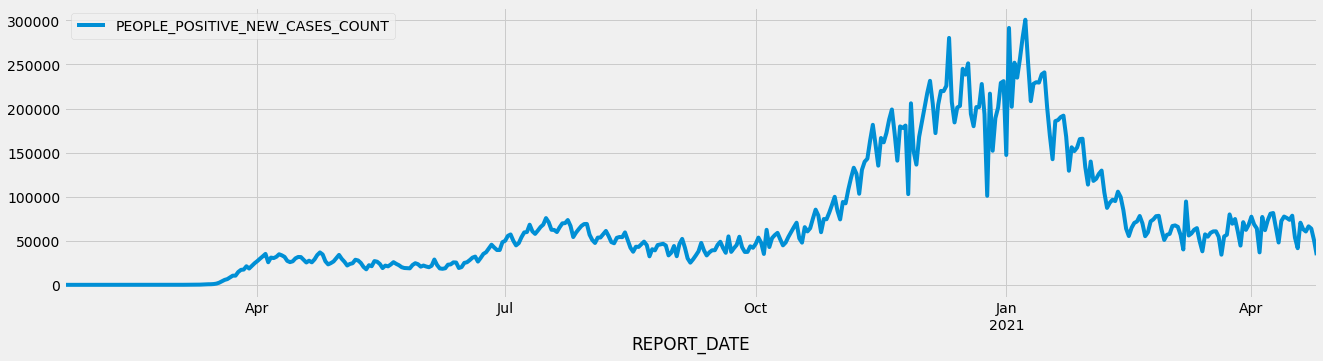

In [102]:
usa_cases.plot(figsize=(20,5))

# ETS decomposition

###### ETS decomposition of cases

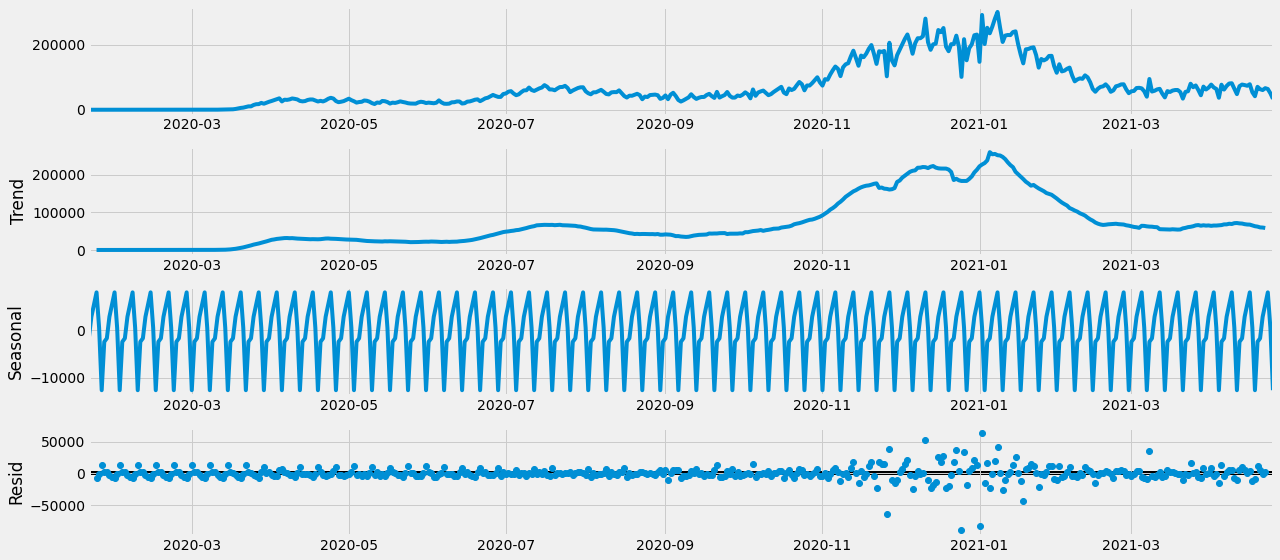

In [105]:
from pylab import rcParams
rcParams['figure.figsize']=18,8
decomposition_usa_cases = sm.tsa.seasonal_decompose(usa_cases,model='additive')
decomposition_usa_cases.plot();

###### Test for stationarity

In [136]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [137]:
adf_test(usa_cases['PEOPLE_POSITIVE_NEW_CASES_COUNT'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -1.442165
p-value                   0.561903
# lags used              14.000000
# observations          446.000000
critical value (1%)      -3.445097
critical value (5%)      -2.868042
critical value (10%)     -2.570233
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


# Train test split

In [106]:
len(usa_cases)

461

In [109]:
461-60

401

In [111]:
train_usa_cases = usa_cases.iloc[:401]
test_usa_cases = usa_cases.iloc[401:]

In [112]:
len(test_usa_cases)

60

### Find the best model

In [113]:
#Now let's use the SARIMAX function
from pmdarima import auto_arima

In [149]:
model_cases = auto_arima(usa_cases['PEOPLE_POSITIVE_NEW_CASES_COUNT'],seasonal=True,m=7,trace=True)

In [150]:
model_cases.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  461
Model:             SARIMAX(3, 1, 2)x(1, 0, 2, 7)   Log Likelihood               -5032.345
Date:                           Tue, 27 Apr 2021   AIC                          10082.689
Time:                                   17:35:16   BIC                          10119.870
Sample:                                        0   HQIC                         10097.330
                                           - 461                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7374      0.100      7.356      0.000       0.541       0.934
ar.L2         -0.1304      0.070     -1.862      0.063      -0.268       0.007
ar.L3         -0.2219      0.080     -2.767      0.006      -0.379      -0.065
ma.L1         -1.4119      0.098    -14.391      0.000      -1.604      -1.220
ma.L2          0.7601      0.065     11.660      0.000       0.632       0.888
ar.S.L7        0.9806      0.034     29.252      0.000       0.915       1.046
ma.S.L7       -0.5718      0.043    -13.305      0.000      -0.656      -0.488
ma.S.L14      -0.3088      0.043     -7.171      0.000      -0.393      -0.224
sigma2       2.43e+08   2.66e-10   9.13e+17      0.000    2.43e+08    2.43e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              9056.80
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):             104.35   Skew:                            -1.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.55e+33. Standard errors may be unstable.
"""

In [151]:
model_cases

ARIMA(order=(3, 1, 2), scoring_args={}, seasonal_order=(1, 0, 2, 7),
      suppress_warnings=True, with_intercept=False)

### Train the model

In [117]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [152]:
model_cases = SARIMAX(train_usa_cases['PEOPLE_POSITIVE_NEW_CASES_COUNT'],order=(2, 1, 4),seasonal_order=(1, 0, 2, 7),enforce_invertibility=False)

In [153]:
result_cases = model_cases.fit()

C:\Users\fawas\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [154]:
result_cases.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:        PEOPLE_POSITIVE_NEW_CASES_COUNT   No. Observations:                  401
Model:             SARIMAX(2, 1, 4)x(1, 0, [1, 2], 7)   Log Likelihood               -4396.047
Date:                                Tue, 27 Apr 2021   AIC                           8812.094
Time:                                        17:35:44   BIC                           8852.008
Sample:                                    01-21-2020   HQIC                          8827.900
                                         - 02-24-2021                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0125      0.299      3.389      0.001       0.427       1.598
ar.L2         -0.5958      0.248     -2.403      0.016      -1.082      -0.110
ma.L1         -1.6873      0.291     -5.806      0.000      -2.257      -1.118
ma.L2          1.4007      0.413      3.393      0.001       0.592       2.210
ma.L3         -0.5304      0.198     -2.675      0.007      -0.919      -0.142
ma.L4          0.1402      0.069      2.039      0.041       0.005       0.275
ar.S.L7        0.9761      0.047     20.910      0.000       0.885       1.068
ma.S.L7       -0.5455      0.059     -9.247      0.000      -0.661      -0.430
ma.S.L14      -0.3298      0.057     -5.767      0.000      -0.442      -0.218
sigma2      2.826e+08   4.59e-09   6.16e+16      0.000    2.83e+08    2.83e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              6957.29
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):             124.60   Skew:                            -1.14
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.72e+32. Standard errors may be unstable.
"""

In [155]:
#Now we can predict the values into the future
start = len(train_usa_cases)
end = len(train_usa_cases) + len(test_usa_cases) - 1

In [156]:
prediction_cases = result_cases.predict(start,end).rename('SARIMA model')

<AxesSubplot:xlabel='REPORT_DATE'>

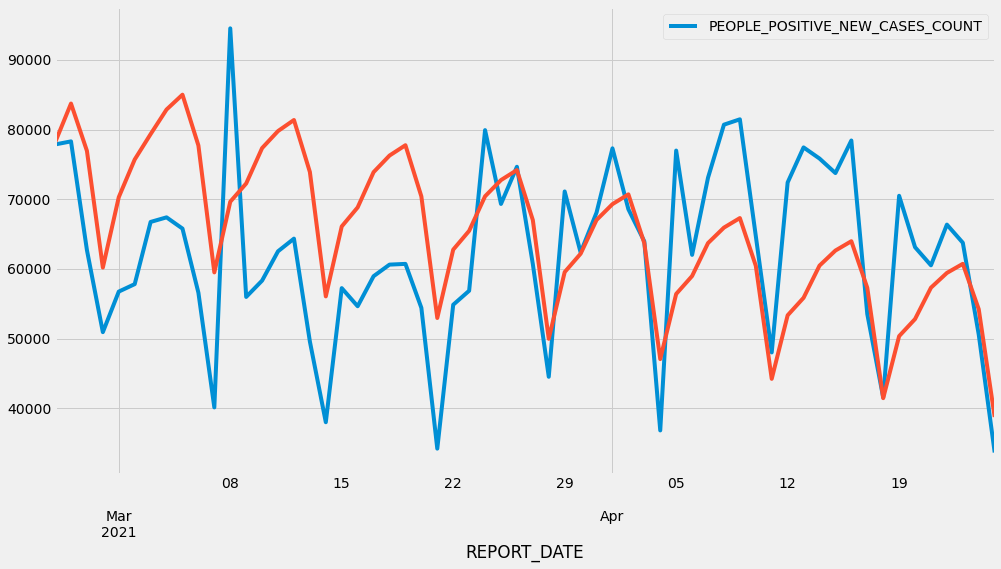

In [157]:
test_usa_cases['PEOPLE_POSITIVE_NEW_CASES_COUNT'].plot(legend=True,figsize=(15,8))
prediction_cases.plot()

# Forecast into unknown future

In [161]:
model_cases_fc = SARIMAX(usa_cases['PEOPLE_POSITIVE_NEW_CASES_COUNT'],order=(2, 1, 4),seasonal_order=(1, 0, 2, 7),enforce_invertibility=False)

In [162]:
result_cases_fc = model_cases_fc.fit()

C:\Users\fawas\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [164]:
fcast_cases = result_cases_fc.predict(len(usa_cases),len(usa_cases)+60,typ='levels').rename('SARIMA forecast')

<AxesSubplot:xlabel='REPORT_DATE'>

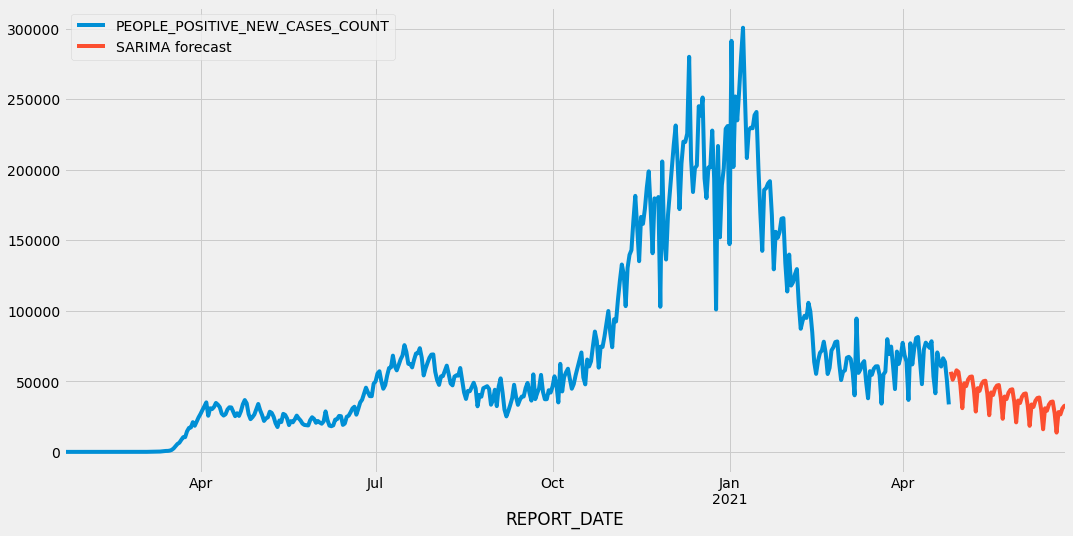

In [166]:
usa_cases['PEOPLE_POSITIVE_NEW_CASES_COUNT'].plot(legend=True,figsize=(16,8))
fcast_cases.plot(legend=True)